In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
bot_users = pd.read_csv("C:potential_social_botnets.csv")
bot_users.head(3)

,username,email_id,email_provider_id,is_major_email_provider,email_reuse_id,password_id,is_common_password,creation_date
0,Eleanor2345,email_9794418,email_provider_14,True,email_reuse_6100,password_1003131,False,2009-11-14 00:41:42.176683-05
1,Carling2345,email_9794410,email_provider_14,True,email_reuse_6100,password_1003131,False,2009-11-11 04:27:49.997487-05
2,Cecania23456,email_9794246,email_provider_14,True,email_reuse_6100,password_1003131,False,2009-11-11 07:15:30.413369-05


In [3]:
bot_comments = pd.read_csv("C:botnet_comments.csv", low_memory=False)
bot_comments.rename(columns={'reatedAt':'createdAt'},inplace=True)
bot_comments.drop(['media', 'moderationLabels', 'numReports', 'parent', 'sb','isNewUserNeedsApproval', 'isHighlighted', 'isAtFlagLimit', 'isDeletedByAuthor', 'isDeleted', 'isSpam', 'isFlagged', 'editableUntil', 'isApproved'], axis=1, inplace=True)
bot_comments['lenMessage'] = bot_comments.message.astype(str).map(lambda x: len(x))
bot_comments.columns

Index(['username', 'canVote', 'createdAt', 'dislikes', 'forum', 'id',
       'isEdited', 'likes', 'message', 'points', 'lenMessage'],
      dtype='object')

To identify a bot network:
1. Similar username construction.
2. Comments will have similar purpose:
    - To raise awareness about something (eg. Syria)
    - To trick people into clicking hyperlinks (eg. scam links)
    - To spread opinion (eg. kpop messages, politics)

Previously, I looked into comments that remarked on Syria, and was easily able to identify the network since they all had comments that were either identical or commented on the same topic, or had their usernames in the same regex format (^[A-Z].+_[A-Z].+). These networks are easy to identify.
This time I chose to target the bot that commented the most, and it turns out that its network is pretty obscure and well-hidden.

In [4]:
truefaith1_messages = bot_comments.loc[(bot_comments.username == 'truefaith1') & (bot_comments.lenMessage > 10)]
bot_comments.loc[(bot_comments.message.isin(truefaith1_messages.message)) & (bot_comments.username != 'truefaith1')]

,username,canVote,createdAt,dislikes,forum,id,isEdited,likes,message,points,lenMessage
1732,jump_master82,False,2020-11-19T22:52:00,1,breitbartproduction,5158268517,False,0,<p>Prove it</p>,-1,15
12706,woodysway,False,2012-05-31T14:44:18,0,bdn,543803385,False,3,<p>Yes.</p>,3,11
15963,twitter_251346316,False,2011-12-30T10:44:24,0,ajblogs,397158523,False,0,<p>Why?</p>,0,11
17845,912anita,False,2011-10-30T23:14:13,0,foxnews,351288974,False,1,<p>loser</p>,1,12
20313,912anita,False,2011-07-14T05:16:17,0,nationfoxnews,251823796,False,4,<p>me too.</p>,4,14
...,...,...,...,...,...,...,...,...,...,...,...
204601,buzzzyman2,False,2011-12-20T22:43:33,0,chrisbrogan,391003678,False,0,<p>good point</p>,0,17
233986,amanda3456,False,2010-12-24T13:35:32,0,nashvillest,118195499,False,0,<p>Merry Christmas!</p>,0,23
248807,VagLiker,False,2012-04-21T23:40:34,0,cnn,505810369,False,0,<p>nope</p>,0,11
263147,antiquebarberchair,False,2010-04-10T09:51:44,0,tribunesearch,44178141,False,0,<p>RIP.</p>,0,11


Little to no correlation between any of the comments by truefaith1 and the rest of the bot comments.
So what exactly is the purpose of truefaith1?
1. Try to find out if the dates of comments created by truefaith1 has any connection.
2. Could truefaith1 be an actual user? Try to find out if user ID matches any other bots' IDs because bots from the same network usually have the same password IDs.


In [6]:
truefaith1_messages["createdAt"] = pd.to_datetime(truefaith1_messages.createdAt.astype(str).str.split(' ').str[0])
truefaith1_messages.createdAt.value_counts()

C:\Users\maeky\AppData\Local\Temp/ipykernel_41796/4224081205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  truefaith1_messages["createdAt"] = pd.to_datetime(truefaith1_messages.createdAt.astype(str).str.split(' ').str[0])


2017-03-01    43
2019-08-13    39
2019-08-14    35
2017-04-24    28
2020-10-09    26
              ..
2018-02-01     1
2017-12-28     1
2019-11-02     1
2017-12-30     1
2020-03-17     1
Name: createdAt, Length: 1096, dtype: int64

<AxesSubplot:>

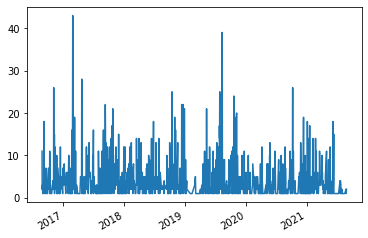

In [7]:
truefaith1_messages['createdAt'].value_counts().plot(kind='line')

In [8]:
truefaith1_messages.loc[truefaith1_messages.createdAt == '2017-03-01'].forum.value_counts()

breitbartproduction    43
Name: forum, dtype: int64

In [9]:
bot_users.loc[bot_users.username=='truefaith1'].password_id

53995    password_1557500
Name: password_id, dtype: object

In [10]:
truefaith1_network = bot_users.loc[bot_users.password_id == 'password_1557500']
len(truefaith1_network)

84

On 2017-03-01, truefaith1 commented 43 times, the most number of times it commented since created. I looked into what these comments were but found nothing similar, but I noted that they were all in the same forum: breitbartproduction. This is not much of a breakthrough, so I assume looking into the dates led me to a deadend.
I will try to:
1. Look if there are any correlations in their comments,
2. Figure out any similar username convention,
3. Look at when all these accounts were created or when they commented.

In [11]:
truefaith1_network_messages = bot_comments.loc[bot_comments.username.isin(truefaith1_network.username)]
temp = len(truefaith1_network_messages.drop_duplicates('message'))
print(f"Bot users in network: {len(truefaith1_network_messages.drop_duplicates(subset='username'))}, Total no. of comments: {len(truefaith1_network_messages)}")
print(f"Unique comments: {temp}, Percentage of unique: {round(temp/len(truefaith1_network_messages)*100, 2)} %")

Bot users in network: 49, Total no. of comments: 13482
Unique comments: 13298, Percentage of unique: 98.64 %


In [12]:
temp = len(truefaith1_network_messages.loc[truefaith1_network_messages.username.str.contains('.+[0-9]+$', regex=True)].username.value_counts())
print(f"No. of users with '.+[0-9]+$' regex name format: {temp}")
truefaith1_network_messages.username.unique()

No. of users with '.+[0-9]+$' regex name format: 18


array(['truefaith1', 'KayakMomma', '912anita', 'purpleodyssey', 'hmm43',
       'ificanhelp', 'NLVMOM', 'sicofdeadbeats', 'Bfaithful',
       'Gloryb2God', 'jessayin', 'double2d',
       'remote-domain-45a9c220aa008c10a0e581f44c0627e9', 'nanamarcy',
       'Pissy23', 'tonyperry', 'psittacism', 'lakeresident',
       'MorganHillResident', 'c63', '2dogs2', 'arm985', 'ayse007',
       'Beckybear19', 'JK40', 'Tbone1555', 'CmonUall', 'sgtmac1',
       'whatatragedy', 'ladyshipII', '1rebelgirl1', 'Tjones10',
       'mlbam-e8be1923e40edc34a82daf7e7faf8d5e', 'IMHO1', 'DeniseSummers',
       'myopinion83221', 'bizjournals-MzAwOTAwNDozOmx2c1lTTVYvZTJs',
       '421850', 'justsayinwhatithink', 'everettrl', 'talentedtenth',
       'redrooster17', 'winlan', 'lennybruce', 'fruitpunch',
       'myopinionfaq', 'ireneraelian', 'kwilliamsteam', 'ColusaCA'],
      dtype=object)

C:\Users\maeky\AppData\Local\Temp/ipykernel_41796/737291858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  truefaith1_network_messages["createdAt"] = pd.to_datetime(truefaith1_network_messages.createdAt.astype(str).str.split(' ').str[0])


<AxesSubplot:>

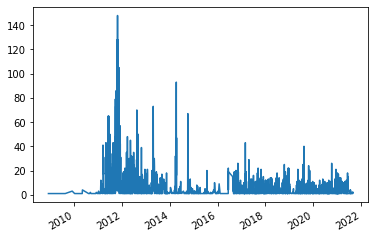

In [14]:
truefaith1_network_messages["createdAt"] = pd.to_datetime(truefaith1_network_messages.createdAt.astype(str).str.split(' ').str[0])
truefaith1_network_messages.createdAt.value_counts().plot(kind='line')

C:\Users\maeky\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:>

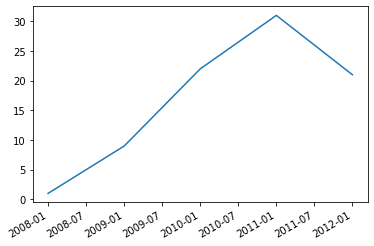

In [17]:
truefaith1_network.creation_date = pd.to_datetime(truefaith1_network.creation_date.astype(str).str.split(' ').str[0])
truefaith1_network.creation_year = pd.to_datetime(truefaith1_network.creation_date.astype(str).str.split('-').str[0])
pd.to_datetime(truefaith1_network.creation_year.astype(str).str.split('-').str[0]).value_counts().plot(kind='line')

1. 98.64 % of the comments from this network sharing password IDs with truefaith1 was unique. No correlation.
2. Seems to have a mix of username conventions with the most common structure having only 18 instances.
3. Some spikes in comment frequency over time that looked suspicious. It seems a lot of the accounts were created on 2011, and judging by the first graph, a lot of them were highly active around the end of 2011. This reaffirms my guess that they are from the same network, however I cannot find any correlation in their data whether it be username convention, comments created, or purpose.

In [71]:
common_words = pd.Series(' '.join(truefaith1_network_messages['message']).lower().split()).value_counts().reset_index()
common_words = common_words.rename(columns={'index':'words', 0:'count'})
common_words.iloc[300:500].head(50)

,words,count
300,me.,171
301,let's,170
302,alec,169
303,<p>no,169
304,everyone,168
305,truth,168
306,buy,168
307,watch,168
308,once,167
309,election,167


## **Conclusion:**
I was unable to find any distinctive similarities for this network. A possible reason is because these bots used their own machine-learning algorithm to mimic interactions between real users. They must be using their own database consisting of how humans communicate on social media to write their responses. 

Observing the bot truefaith1 and its network, there is bias against democrats in their comments when I went through it on my own. The words that appear quite frequently seemed to talk about American politics. The best I can gather is that they were artificially amplifying the popularity of the creator's opinion.

If these networks were created based off of a database of actual human responses, what is the best approach to identify similar networks when we do not have their database?